<a href="https://colab.research.google.com/github/MaximusDecimusV/DSLearning/blob/master/DataEthics4All_Bootcamp_DS_101.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Welcome to Bootcamp Day and Data Science 101

This is a 101 level class, so it is meant to be introductory. 

I have intentionally kept this notebook at a fairly high level to encourage participation from folks of all backgrounds. If you want to learn more and continue exploring on your own, I will share resources to learn more about the functions and libraries I use throughout the class and I will have them linked in **Notes** under each section.

At the end I will also share links to free textbooks and more online resources to continue your learning journey.

## Some Housekeeping:

* Please mute yourself when you are not talking
* I will share the link to this Notebook on Google Colab for you to go over these steps on your own, so taking notes are completely optional
* The slides may seem verbose, but they are intended to be standalone so that you can refer back to this whenever you need to
* Please save a copy of this file in your own Google Drive before you start making changes
* Please ask questions, the class is meant to be interactive



## Introduction

[Wikipedia](https://en.wikipedia.org/wiki/Data_science) defines Data science as an inter-disciplinary field that uses scientific methods, processes, algorithms and systems to extract knowledge and insights from many structural and unstructured data. It uses techniques and theories drawn from many fields within mathematics, statistics, computer science, business and information science.

Hal Varian, Chief Economist at Google and Professor of Information Sciences, University of California, Berkeley, said this about Data Science:

“The ability to take data — to be able to understand it, to process it, to extract value from it, to visualize it, to communicate it — that’s going to be a hugely important skill in the next decades.”

## Stages of a Typical Data Science Project

### 1. Problem Definition

A typical Data Science project starts with a problem definition. The tools you will use will depend on the problem you are trying to solve. Tailor the solution to the problem. 

### 2. Data Acquisition

Once you have identified a problem, you need to get the data you need to solve the problem. In the industry, data is usually stored in a relational database system like Oracle or MySQL or in a Distributed File System like Hadoop/Spark. The language used to extract the data from these sources is almost always SQL or some variant of it (e.g. MySQL, T-SQL, Hive, Presto, SparkSQL, etc.).

[W3Schools](https://www.w3schools.com/sql/) has a wonderful SQL Tutorial that will get you up to speed on the SQL basics.

Since we are going to be working on a public hackathon, the data sources we rely on are public data sources. Google has released a [Google Dataset Search](https://datasetsearch.research.google.com/) tool, that helps us look for publicly available datasets to solve problems of interest. 

### 3. Exploratory Data Analysis and Findings

Once you have the data you need, the next step is to analyze and visualize the data to uncover hidden patterns and figure out which parts of data you will use for the next steps.

### 4. Model Training, Validation and Testing

This step is only needed if the right solution for your problem is a machine learning model. You will use the insights you uncovered in the data analysis to train and test a robust machine learning model.

I will cover what each of these steps mean in mode detail along with an example below.


### 5. Model Deployment

Once the model is built, the model needs to be deployed in a live environment to continue producing predictions. This requires knowledge in Software Engineering, and Live Operations, it's evolving into a field of its own called ML Ops (Machine Learning Operations).

### 6. Documentation

Your job is not done when the technical work is done. It is important to document the steps you took and the learnings you gained, so that the next time someone needs to build solutions for a similar problem, they can refer to your documentation.

## An Example Problem to Illustrate the various Steps

Let's say you're a wine enthusiast and you find that the current app marketplace is seriously lacking in the ability to tell you the quality of a wine you're interested in given its characteristics like acidity, alcohol content, density, etc. 

You would first clearly define the problem you're trying to solve.

### 1. Problem Definition

**To build a service to predict the quality of wines given various characteristics.**

### 2. Data Acquisition

Now that you've defined your problem, you need to find datasets containing wine quality scores and various physical and chemical characteristics of wine. Google is your friend.

1. Go to https://datasetsearch.research.google.com/
2. Search for a topic of interest,  as expected dataset searches related to COVID are trending, but eye on the prize -- we want a dataset containing wine quality scores. So search "Wine Quality"
3. Looks like there are quite a few datasets that match what we need.

**Notes:**
* [Kaggle](https://www.kaggle.com/datasets) is a good source for downloading datasets, but it requires sign up. Kaggle also has publicly available notebooks that contain the solution of others. Please remember to cite them when you use someone else's work.
* Other great sources are [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php), [AWS Open Data Registry](https://registry.opendata.aws/), [CMU Library](https://guides.library.cmu.edu/machine-learning/datasets).

Let's download the file *'winequality-white.csv'* from [UCI Repository](http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv). 

Now that the dataset is downloaded, we have to import them to Google Colab. Remember - Colab is running in the cloud, so we have to upload the dataset. Let's do that next.

In [ ]:
#Uploading the file from local to a place where Colab can read
from google.colab import files 
uploaded = files.upload()

Saving winequality-white.csv to winequality-white.csv


**Note:** Generally from xx import yy is a way for us to tell python go import a function yy from an existing library xx. Colab manages all the libraries for us, but if you were setting things up on your own, you have to first install the required libraries.

With the file uploaded, we have to tell python to read the file we just uploaded.

In [ ]:
#Importing libraries
import io
import pandas as pd 

df = pd.read_csv(io.BytesIO(uploaded['winequality-white.csv']),sep = ";") #Reading the dataset
df.head() #Looking at a sample of the data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


**Note:** Pandas is a very powerful python library for data processing. Learn more about it [here](https://pandas.pydata.org/docs/).

### 3. Exploratory Data Analysis and Findings

You have the data. Now let's try exploring it through visuals and summaries.

In [ ]:
df.info() #A glance at the columns, their datatypes and counts.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [ ]:
df.describe() #Looking at summary statistics like mean, std. deviation, median and various percentiles.

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [ ]:
#Importing libraries for data visualization
import seaborn as sns
import matplotlib.pyplot as plt

**Notes:** 

1. Seaborn is a Data Visualization library built to produce attractive data visualizations. You can learn more about it [here](https://seaborn.pydata.org/).

2. Seaborn is built on top of matplotlib which is the OG Python plotting library. You can learn more about matplotlib [here](https://matplotlib.org/3.3.1/contents.html).

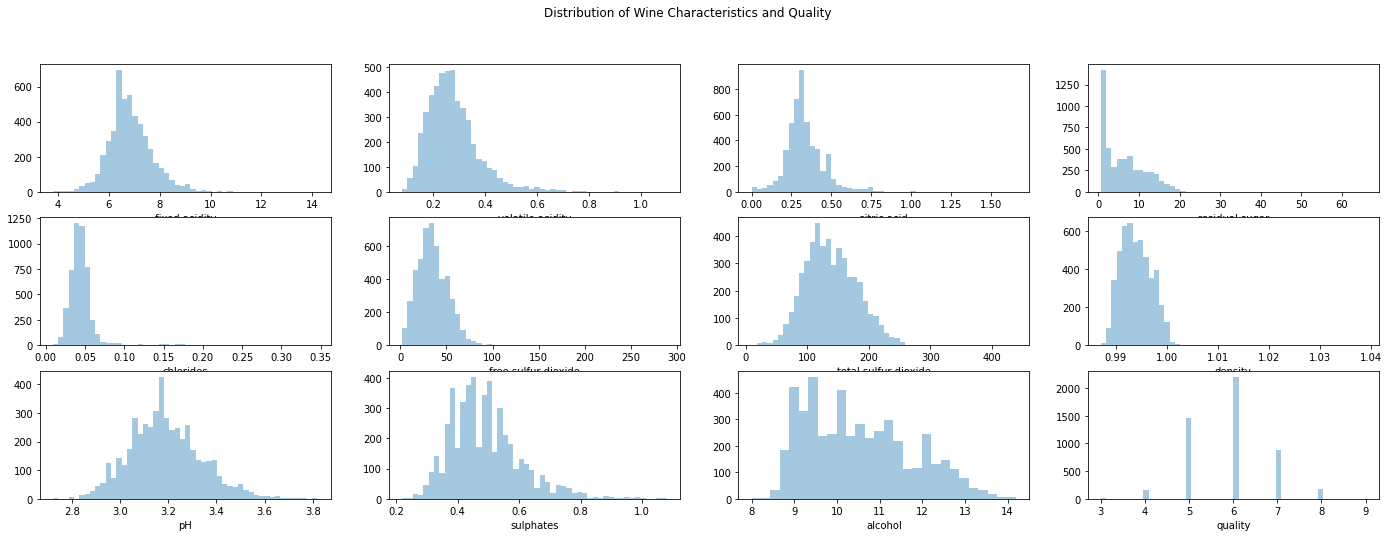

In [ ]:
#Plotting a bunch of histograms
f, axes = plt.subplots(3, 4, figsize=(24, 8))#Setting a figure size
i = 0
j = 0
for column in df.columns:
  if j <=3 :
    sns.distplot( df[column], ax=axes[i, j], kde = False)
    j += 1
  else:
    i += 1
    j = 0
    sns.distplot( df[column], ax=axes[i, j], kde = False) 
    j += 1
f.suptitle("Distribution of Wine Characteristics and Quality")
plt.show()

**Note:** Histograms are a great tool to understand the underlying distribution of your data, identify if the distribution is skewed, which will then help us decide on transformations we need to make before we train a model (if necessary). You can learn more about statistics and probability distributions through Khan Academy [here](https://www.khanacademy.org/math/statistics-probability/random-variables-stats-library).

From the last chart above, it's clear that the quality score only ranges between 3 and 8 even though it's a 1-10 scale based on what the data dictionary associated with the dataset says. This makes sense because people rarely rate things 0/10 or 10/10, especially something as subjective as wine quality.

So let's create a "good" and "bad" quality, where if the score is 7 or greater it's "good" and anything less is "bad".

In [ ]:
df['quality_score'] = df['quality']
df['quality'] = ["good" if x >= 7 else "bad" for x in df['quality_score']] 
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_score
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,bad,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,bad,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,bad,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,bad,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,bad,6


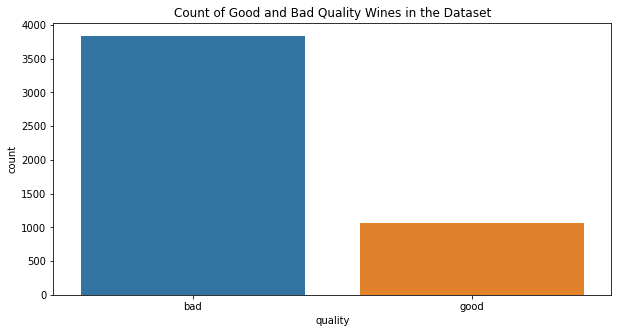

In [ ]:
plt.figure(figsize = (10,5))
sns.countplot(df['quality'])
plt.title("Count of Good and Bad Quality Wines in the Dataset")
plt.show()

In [ ]:
cols = list(df.columns)
cols.remove('quality')

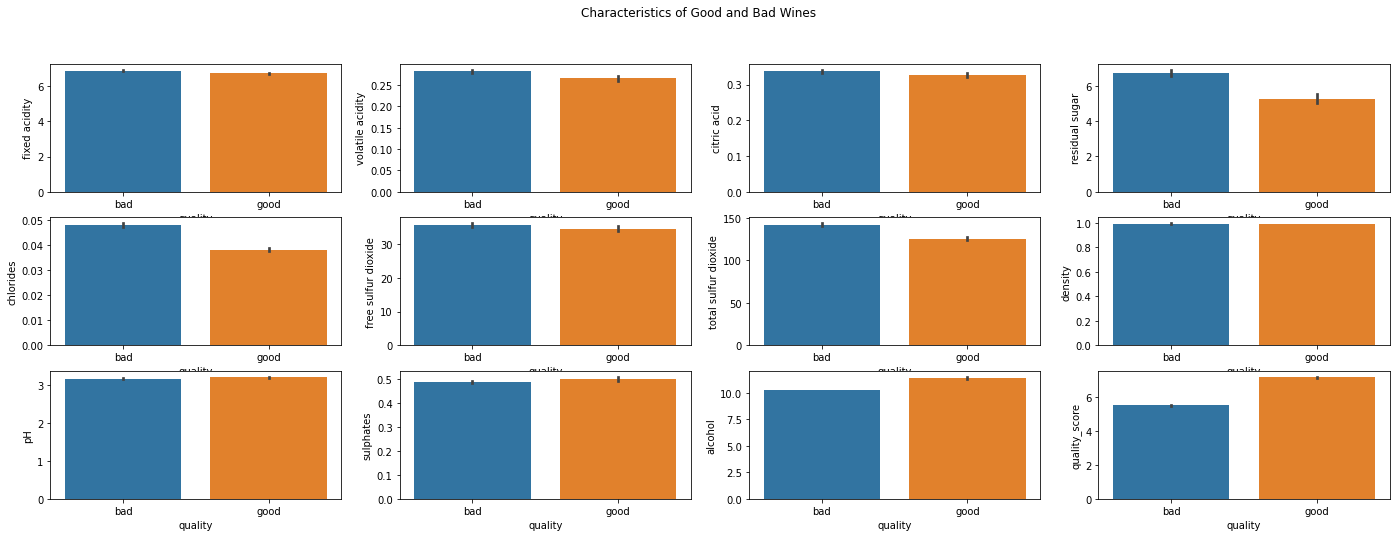

In [ ]:
#Plotting a bunch of bar charts to see how quality relates to different measures
f, axes = plt.subplots(3, 4, figsize=(24, 8))#Setting a figure size
i = 0
j = 0
for column in cols:
  if j <=3 :
    sns.barplot( x = 'quality', y = column, data = df, ax=axes[i, j])
    j += 1
  else:
    i += 1
    j = 0
    sns.barplot( x = 'quality', y = column, data = df, ax=axes[i, j])
    j += 1
f.suptitle("Characteristics of Good and Bad Wines")
plt.show()

**Findings:**

Good quality wines on average tend to lower acidity, lower residual sugar, lower chlorides, lower sulfur dioxide, higher sulphates, and higher alcohol.

### 4. Model Training, Validation and Testing

Before we get to the actual modeling, there are few concepts you need to learn.

#### (i) What is a model?

A model is typically an algorithm that can explain the relationship between the outcomes we want to predict (also known as labels, in this case wine quality) and the characteristics or variables that we can use to predict / explain the outcomes (also known as features, in this case all the charactistics like acidity, alcohol, content, etc.).

#### (ii). Feature Scaling (Pre-processing the data)

Algorithms don't understand "good" and "bad" quality. To make them understand we have to encode the labels "good" and "bad" into labels that can be predicted. This is called encoding.

The characteristics of the wines we're considering (features) take on values in various ranges. E.g. fixed acidity ranges from 4.6 to 16.9 whereas volatile acidity ranges from 2.7 to 4.0. To ensure all the features operate on the same scale (typically 0 to 1) we transform the features to all fall into the same scale. This is called feature scaling.


**Note**: you can learn more about the various encoding and scaling techniques [here](https://scikit-learn.org/stable/modules/preprocessing.html)

#### (iii) Training:

Model training is a way for us to teach a model to learn the relationship between the labels and the features by feeding it data containing both features and the labels. 

There are different machine learning algorithms, each suited for a specific type of problem. With packages like scikit-learn, we have the ability to train different types of models with just a few lines of code.

Models can range in complexity from simple rules based approaches to complex quantitative relationships involving hundreds of different variables. We've already used a very simple rules based approach to create two qualities of wine from the dataset, which is summarized in English by *if wine quality score is seven or more then wine_quality is good, else it's bad*, which in Python would look like:

In [ ]:
def simple_model(wine_quality_score):
  if wine_quality_score >= 7:
    quality = "Good"
  else:
    quality = "Bad"
  return quality

You can pass the wine quality score to this simple model and get the output.

In [ ]:
print("Wine quality is:", (simple_model(8)))

Wine quality is: Good



#### (iv). Model errors

Almost all models have errors, our goal while training the model is to reduce the errors. However, we also want the model to perform well on data it has never seen before. This character of models to be able to accurately make predictions on new/unseen data is called generalization.

For example, we have ~4900 different types of wines and their associated characteristics in the wine quality dataset. If a new wine enters the market tomorrow, we want our model to be able to correctly predict the quality of that wine. 

But how do we measure generalization? To do this really well we need to understand the second concept:

#### (iv). Bias - variance tradeoff

Simply stated, a model's errors could be because the model is too simple (underfit) or too complex (overfit). When a model is underfit, we say there is more error due to bias, when a model is overfit, we say there is more error due to variance. Our goal during the modeling phase is to make sure that the model is neither underfitting nor overfitting.

To make this happen, we split the data into training, validation, and test samples. We train our model only on the training data, never exposing it to the test data.  We measure the error on the test data, and validation data, compare it against the error we got in the training data and infer whether the model is overfitting, underfitting or just right.

**Rule of thumb:** if training errors are high, the model is underfit. If training error is low, test error is high, the model is overfit.

![img](https://miro.medium.com/max/700/1*CgIdnlB6JK8orFKPXpc7Rg.png)

**Note:** The source of the image is this article [this article](http://scott.fortmann-roe.com/docs/BiasVariance.html) written by Scott Fortmann-Roe. It's a great resource to learn about Bias-Variance tradeoff.

#### (v). Measurement of model errors

(**Massive generalization and simplications incoming**, learn more about the types of Machine Learning algorithms [here](https://en.wikipedia.org/wiki/Machine_learning#Types_of_learning_algorithms)) 

The measurement of error will depend on the type of problem.Very broadly Machine Learning algorithms fall under two buckets: regression algorithms where you're predicting a continuous numeric variable as the label (e.g. tomorrow's temperature, price of a home, etc.) and classification algorithms where you're predicting discrete categorical variables as the label (e.g. wine quality, will it rain tomorrow, etc.).

For regression problems, the the measure of error typically is called Root Mean Squared Error (or Mean Absolute Error), which is the square of the difference between the predicted value and the actual value (or the absolute value of the difference between the predicted value and actual value).

For classification problems, the measures of error are given by three numbers:

1. Precision
2. Recall
3. Accuracy

To understand each of these, you need to understand the **confusion matrix**

![](https://miro.medium.com/max/4420/1*btcfBuM5Eqqc6rJ3iw3sNQ.png)

Source for the image is this [Medium post](https://medium.com/@alon.lek/should-i-look-at-precision-recall-or-specificity-sensitivity-3946158aace1) by [Alon Lekhtman](https://medium.com/@alon.lek).

The article is also a good explanation for precision and recall.





#### (vi). Validation and Testing

Once the model is trained, we have to test to see if the model generalizes to data it has never seen before. There are two ways to achieve that, known as validation and testing.

In most ML algorithms, we only split the data into training and test (80%/20% or 70%/30%, etc.). For validation, we use a process called *cross-validation*. It works by holding out (hiding) a random sample from the model while training and using the holdout (hidden) samples to test the model on. You can learn more about cross-validation techniques [here](https://scikit-learn.org/stable/modules/cross_validation.html).

We use the cross-validation step to identify shortcomings of the model and *tune* them to achieve better results by either adding /removing /editing features or by changing the characteristics of the model itself, also known as *hyper-parameters*.

Once we acheive the desired results (low errors) in training and validation, then we test the tuned model in the test data to ensure the model generalizes.

**Note:** scikit-learn is a Python library that supports machine learning algorithms and the associated data processing techniques. You can learn more about scikit-learn [here](https://scikit-learn.org/stable/index.html).

In [ ]:
#First, encoding labels

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['quality'] = label_encoder.fit_transform(df['quality']) #"bad" becomes 0 "good" becomes 1

df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_score
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,0,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,0,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,0,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0,6


**Note:** In machine learning parlance, we often denote features with the matrix **X** and labels with the vector **y**

In [ ]:
# Let's split the data into features and labels

X = df.drop(['quality', 'quality_score'], axis = 1)
y = df['quality']

print(X.shape, y.shape)

(4898, 11) (4898,)


In [ ]:
# Let's split the data into train and test samples

from sklearn.model_selection import train_test_split

#We are telling the function train_test_split imported from scikit-learn to split the data with 20% of the samples going to test data and 80% going to training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(3918, 11) (3918,)
(980, 11) (980,)


In [ ]:
# Scaling the features
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()

X_train = std_scaler.fit_transform(X_train)
X_test = std_scaler.fit_transform(X_test)


#### Let's try a simple classification model first

In [ ]:
#Training the most basic classification model
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression()

log_model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**Note:** Logistic regression is one of the most basic classification algorithms. You can learn more about it [here](https://en.wikipedia.org/wiki/Logistic_regression). You can learn more about the scikit-learn implementation of Logistic Regression in the documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).

In [ ]:
#Training errors

from sklearn.metrics import confusion_matrix, classification_report, precision_recall_fscore_support

train_pred = log_model.predict(X_train)

print(classification_report(y_train, train_pred))
print(confusion_matrix(y_train, train_pred))

              precision    recall  f1-score   support

           0       0.83      0.95      0.89      3085
           1       0.60      0.27      0.37       833

    accuracy                           0.81      3918
   macro avg       0.71      0.61      0.63      3918
weighted avg       0.78      0.81      0.78      3918

[[2934  151]
 [ 609  224]]


In [ ]:
#Validation errors
from sklearn.model_selection import cross_val_score
val_err = cross_val_score(log_model, X = X_train, y = y_train, cv = 10)
val_err.mean()

0.8037234459000991

In [ ]:
#Test errors

test_pred = log_model.predict(X_test)

print(classification_report(y_test, test_pred))
print(confusion_matrix(y_test, test_pred))

              precision    recall  f1-score   support

           0       0.81      0.94      0.87       753
           1       0.57      0.28      0.38       227

    accuracy                           0.78       980
   macro avg       0.69      0.61      0.62       980
weighted avg       0.76      0.78      0.76       980

[[705  48]
 [163  64]]


**Findings:**

Even a basic classification model like logistic regression has a pretty good accuracy of 78% in the test data and 81% in the training data. It also indicates that the model is not over-fitting because the difference in training error, validation error, and test error are small.

We can improve on the accuracy by training a more complicated model like Random Forest.



**WARNING:** The models like Random Forest belong to a class of models called "Ensemble learners" where they use a lot of weak learners which individually perform badly, but do well in aggregate. They are more complex, less explainable, and it's very easy to over-fit models using ensemble learners.

**Note:** You can learn more about ensemble learners from these [lecture slides](http://people.csail.mit.edu/dsontag/courses/ml12/slides/lecture12.pdf) from MIT [Professor David Sontag](http://people.csail.mit.edu/dsontag/).

In [ ]:
#Training the most basic classification model
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

**Note:** There are a lot of things inside the two brackets next to RandomForestClassifier, these are the hyper-parameters I referred to above. We can set them to various numbers to improve the errors of the model during cross validation. That process is called hyper-parameter tuning. There are multiple methods to do it, you can learn more about it [here](https://scikit-learn.org/stable/modules/grid_search.html).



In [ ]:
#Training errors

from sklearn.metrics import confusion_matrix, classification_report, precision_recall_fscore_support

train_pred_rf = rf.predict(X_train)

print(classification_report(y_train, train_pred_rf))
print(confusion_matrix(y_train, train_pred_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3085
           1       1.00      1.00      1.00       833

    accuracy                           1.00      3918
   macro avg       1.00      1.00      1.00      3918
weighted avg       1.00      1.00      1.00      3918

[[3085    0]
 [   0  833]]


In [ ]:
#Validation errors
from sklearn.model_selection import cross_val_score
val_err_rf = cross_val_score(rf, X = X_train, y = y_train, cv = 10)
val_err_rf.mean()

0.8731470849209249

In [ ]:
#Test errors

test_pred_rf = rf.predict(X_test)

print(classification_report(y_test, test_pred_rf))
print(confusion_matrix(y_test, test_pred_rf))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92       753
           1       0.81      0.59      0.69       227

    accuracy                           0.87       980
   macro avg       0.85      0.78      0.80       980
weighted avg       0.87      0.87      0.87       980

[[721  32]
 [ 92 135]]


**Findings:**

RandomForest gives us an accuracy of 86% in the validation and 88% in the test data, however, the training accuracy is 100% indicating that the model is over-fitting. We can correct this through hyper-parameter tuning.

**Note:** To do real justice to hyper-parameter tuning I will have to spend another hour to go over the meanings of these parameters, the idea behind weak lerners and how they get ensembled, etc. The learning resources I will link at the end of the class will go over this in more detail.

#### Receiver Operating Characteristic (ROC) Curve

As mentioned before, Precision and Recall are two different types of accuracy. Recall is the same as true positive rate. There is yet another measure of accuracy called "Specificity" (or True Negative Rate). 1-Specificity is False positive rate. The ROC curve shows the ability of a model to strike a balance between True Positive Rate and False Positive Rate at various model thresholds. A good classification model should have the ROC corve going up into the right and a numerical summary of the "goodness" of the ROC curve is called AUC (or AUROC, or Area Under Receiver Operating Characteristic curve). The closer this number is to 1 (or 100%) the better a binary classification model is.

Let's compare the ROC curves and AUC for both logistic regression and Random forest.

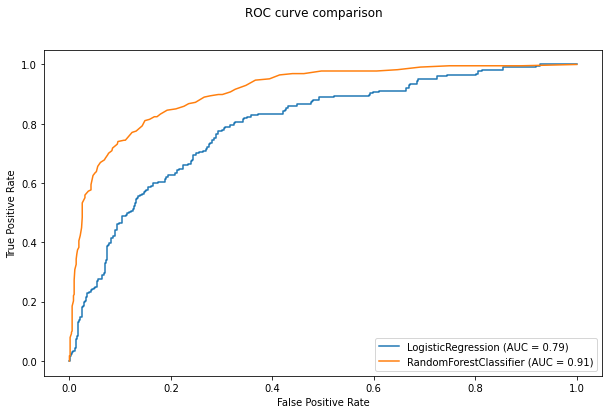

In [ ]:
from sklearn.metrics import plot_roc_curve
logistic_disp = plot_roc_curve(log_model, X_test, y_test)
rfc_disp = plot_roc_curve(rf, X_test, y_test, ax=logistic_disp.ax_)
rfc_disp.figure_.suptitle("ROC curve comparison")
rfc_disp.figure_.set_size_inches(10,6)
plt.show()

**Note:** You can learn more about ROC Curve [here](https://en.wikipedia.org/wiki/Receiver_operating_characteristic).

### Resources to Continue Your Learning Journey

#### **1. Fundamentals:**

Under the hood, Machine Learning models, use a lot of Statistics, Mathematics (primarily Linear Algebra and Calculus), and Computer Science Algorithms.

**Statistics:**

* [StatQuest](https://www.youtube.com/channel/UCtYLUTtgS3k1Fg4y5tAhLbw) is a YouTube channel that covers a lot of the stats fundamentals.

* Khan Academy has an entire series on [Probability and Statistics]((https://www.khanacademy.org/math/statistics-probability)).

* MIT OpenCourseWare also has a class on [Probability and Statistics]((https://ocw.mit.edu/courses/mathematics/18-05-introduction-to-probability-and-statistics-spring-2014/)).

* For those of you who prefer textbooks to learn from Open Textbook Library project has a few introductory statistics [textbooks](https://open.umn.edu/opentextbooks/textbooks/introduction-to-statistics).

**Linear Algebra:**

* Khan Academy again has a series on [Linear Algebra]((https://www.khanacademy.org/math/linear-algebra)).

* MIT OpenCourseWare also has a class on [Linear Algebra]((https://ocw.mit.edu/courses/mathematics/18-06-linear-algebra-spring-2010/)).

**Algorithms:**

* Khan Academy has a series on [Algorithms](https://www.khanacademy.org/computing/computer-science/algorithms).

* MIT OpenCourseWare has a class titled [Intro to Algorithms](https://ocw.mit.edu/courses/electrical-engineering-and-computer-science/6-006-introduction-to-algorithms-spring-2008/).

* MIT OpenCourseWare has another class title [Intro to Computational Thinking and Data Science](https://ocw.mit.edu/courses/electrical-engineering-and-computer-science/6-0002-introduction-to-computational-thinking-and-data-science-fall-2016/index.htm).

#### **2. Practical Machine Learning:**

**Online Courses:**

* Machine Learning by Prof. Andrew Ng. on [Coursera](https://www.coursera.org/learn/machine-learning)

* Machine Learning Crash Course from [Google](https://developers.google.com/machine-learning/crash-course/ml-intro)

* Machine Learning on [AWS](https://aws.amazon.com/training/learning-paths/machine-learning/)

* AI School from [Microsoft](https://aischool.microsoft.com/en-us/machine-learning/learning-paths)

**Textbooks:**

* [Elements of Statistical Learning](https://web.stanford.edu/~hastie/Papers/ESLII.pdf) is the qunitessential ML textbook.

* Another very good textbook is [Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow](https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/) by Aurélien Géron. The texbook itsels is not free, but the associated [GitHub repo](https://github.com/ageron/handson-ml) is free to access for code samples.